# A practical Guide to Feature Engineering in Python

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models and even the quality of insights derived during exploratory data analysis (EDA).

In this article, we’re going to learn some important techniques and tools that will help you properly extract, prepare, and engineer features from your dataset.

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Common function

In [2]:
def Predictive_Model(num_df, cat_df, target):
    
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([num_df,cat_df],axis=1)
    else:
        input_df = num_df.copy()
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(input_df)
    scaled_df = scaler.transform(input_df)
    input_df = pd.DataFrame(scaled_df, columns = input_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, df[target], test_size=0.25, random_state=0, stratify = df[target])
    
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.Logit(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LogisticRegression(C=1e8)
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [3]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [4]:
def ModelEvaluation(num_df, cat_df, target):
    
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([num_df,cat_df],axis=1)
    else:
        input_df = num_df.copy()
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(input_df)
    scaled_df = scaler.transform(input_df)
    input_df = pd.DataFrame(scaled_df, columns = input_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, df[target], test_size=0.25, random_state=0, stratify = df[target])

    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [5]:
def analyze_na_values(df, var, target):
    tmp_df = df.copy()
    print(target)
    
    # Make a variable that indicates 1 if the observation was missing or 0 otherwise
    tmp_df['Missing'] = np.where(df[var].isnull(),1,0)
    
    # Calculate the mean Price where the information is missing or present
    tmp_df =  pd.DataFrame(tmp_df.groupby([target,'Missing'])[target].count())
    tmp_df.columns = ['Count']
    tmp_df = tmp_df.reset_index()
    
    
    if(len(tmp_df[tmp_df[target] == 0] == 1)):
        tmp_df= tmp_df.append({target:0,'Missing':1,'Count':0}, ignore_index=True)

    if(len(tmp_df[tmp_df[target] == 1] == 1)):
        tmp_df= tmp_df.append({target:1,'Missing':1,'Count':0}, ignore_index=True)

    tmp_df.loc[0,'Per']= tmp_df.loc[0,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[1,'Per']= tmp_df.loc[1,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[2,'Per']= tmp_df.loc[2,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    tmp_df.loc[3,'Per']= tmp_df.loc[3,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    sns.barplot(x=target, y = 'Per', data=tmp_df, hue='Missing')
    plt.title(var)
    plt.show()

In [6]:
def Model_Selection(num_df, cat_df, target):
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([num_df,cat_df],axis=1)
    else:
        input_df = num_df.copy()
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(input_df)
    scaled_df = scaler.transform(input_df)
    input_df = pd.DataFrame(scaled_df, columns = input_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, df[target], test_size=0.25, random_state=0, stratify = df[target])

    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'accuracy'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [7]:
from sklearn.manifold import TSNE



def tsne_plot(df, cont_vars):
    
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)
       
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(X_train)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y_train == 0), 0], X_t[np.where(y_train == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y_train == 1), 0], X_t[np.where(y_train == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();
    

# 3. Loading the raw data

In [10]:
df = pd.read_csv('lending_club_loan_two.csv')
org_df = df.copy()

In [9]:
df.shape

(396030, 27)

# 4. Data Exploration & Cleaning

## 4.1. Descriptive Statistics

### 4.1.1. Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### 4.1.2. Descriptive Statistics

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030,NaN,NaN,NaN,14113.9,8357.44,500,8000,12000,20000,40000
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030,NaN,NaN,NaN,13.6394,4.47216,5.32,10.49,13.33,16.49,30.99
installment,396030,NaN,NaN,NaN,431.85,250.728,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030,NaN,NaN,NaN,74203.2,61637.6,0,45000,64000,90000,8.70658e+06


## 4.2. Investigating missing values

In [15]:
miss_val_df = pd.DataFrame(df.isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df = miss_val_df.sort_values('Percentage', ascending=False)
miss_val_df[miss_val_df.Percentage > 0]

,Count,Percentage
mort_acc,37795,9.543
emp_title,22927,5.789
emp_length,18301,4.621
title,1755,0.443
pub_rec_bankruptcies,535,0.135
revol_util,276,0.070


## 4.3. Categorize vars

In [18]:
## target
target = ['loan_status']
print("\nTarget var: ", target)

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 30]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['loan_status']

Categorical vars:  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']
There are 14 categorical variables

Numerical vars:  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
There are 12 numerical variables

Discrete vars:  ['pub_rec', 'pub_rec_bankruptcies']
There are 2 numerical variables

Continous vars:  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']
There are 10 numerical variables


## 4.4. Investigate target var

#### Check if there is row with missing labels or incorrect labels

In [19]:
df[target].describe()

,loan_status
count,396030
unique,2
top,Fully Paid
freq,318357


In [20]:
df['loan_status'].value_counts()/len(df['loan_status'])

Fully Paid    0.804
Charged Off   0.196
Name: loan_status, dtype: float64

**Summary**: 
+ Imbalanced data between 2 classes

### 4.4.2. Distribution

## 4.5. Explore numerical vars

### 4.5.1. Data Overview

In [121]:
df[cont_vars].head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


### 4.5.2. Explore distribution

#### Distribution of Independent Variable

Skewness: 0.829057
Kurtosis: 2.709509


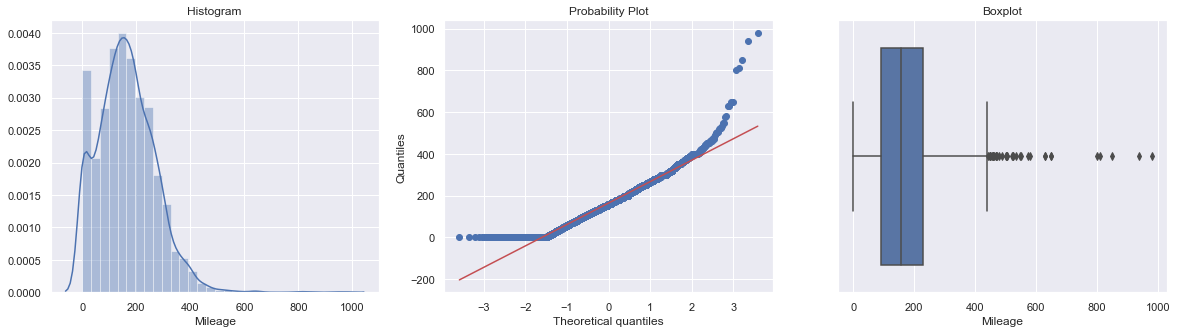

Skewness: 17.154962
Kurtosis: 316.181652


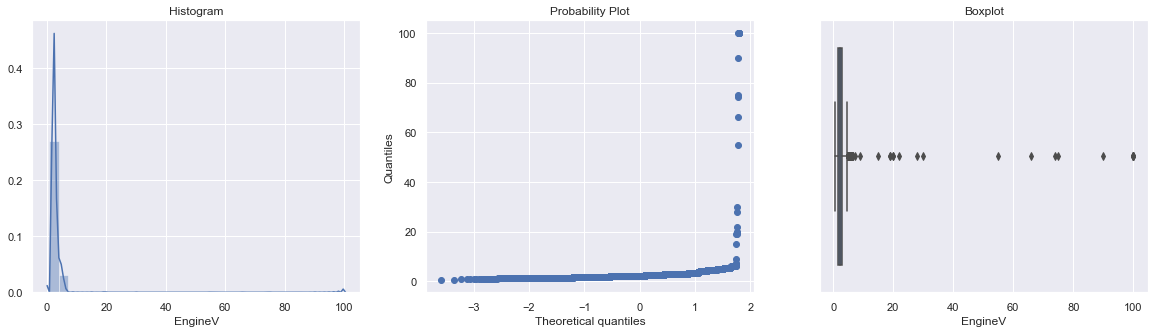

Skewness: -0.950663
Kurtosis: 0.963271


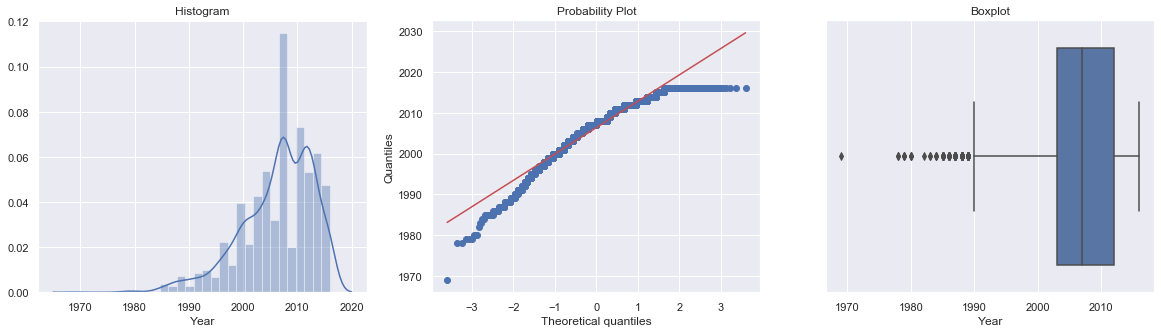

In [122]:
for var in cont_vars:
    analyse_continuous(df,var,target)

#### Bivariate analysis

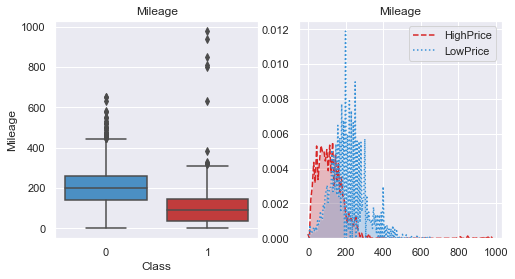

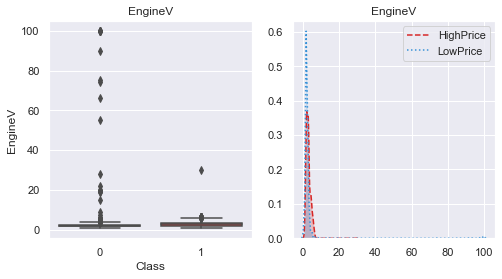

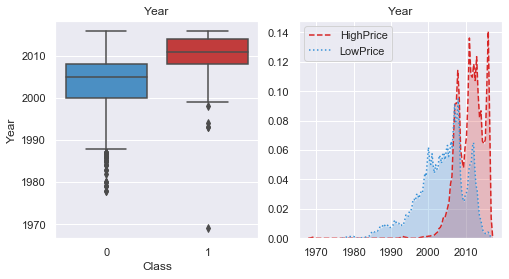

In [123]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=df,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(df[df.Class==1][column], bw = 0.4, label = "HighPrice", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(df[df.Class==0][column], bw = 0.4, label = "LowPrice", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

### 4.5.3. Check correlation

In [124]:
corr = df[cont_vars + ['Class']].corr()
corr.head()

,Mileage,EngineV,Year,Class
Mileage,1.000000,0.024935,-0.657501,-0.483635
EngineV,0.024935,1.000000,-0.030321,0.038659
Year,-0.657501,-0.030321,1.000000,0.538066
Class,-0.483635,0.038659,0.538066,1.000000


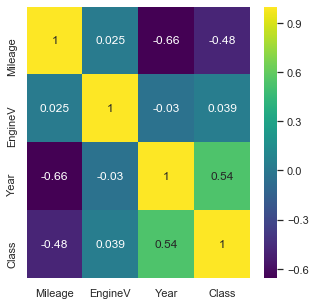

In [125]:
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap='viridis')
plt.show()

### 4.5.4. Statistics Tests 

In [126]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df.sort_values(['abs_tstats'], ascending = False)

,Feature,t-stats,p-value,abs_tstats
2,Year,-41.2267,0,41.2267
0,Mileage,35.6858,1.20488e-243,35.6858
1,EngineV,NaN,NaN,NaN


## 4.6. Explore categorical vars

# 5. Data Driven Story

# 6. Engineering numerical vars

## 6.1. Remove high correlated features

### Introduction: What is the problem with correlated features

### 6.1.1. Approach 1: Brute force approach

In [127]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df[cont_vars], 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


### 6.1.2. Approach 2: Identify groups of highly correlated features

This approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove

In [128]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = df[cont_vars].corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat.head()

Year     Year       1.000000
EngineV  EngineV    1.000000
Mileage  Mileage    1.000000
Year     Mileage    0.657501
Mileage  Year       0.657501
dtype: float64

In [129]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Year,Year,1.000000
1,EngineV,EngineV,1.000000
2,Mileage,Mileage,1.000000
3,Year,Mileage,0.657501
4,Mileage,Year,0.657501


In [130]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = pd.DataFrame()

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        correlated_block = correlated_block[correlated_block['corr'] > 0.8]
        
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]        

        # append the block of features to the list
        correlated_groups = correlated_groups.append(correlated_block)

In [131]:
def MissingPercentage(x):
    return df[x].isnull().sum()/len(df)

In [132]:
correlated_groups['MissingF1'] = correlated_groups.feature1.apply(lambda x:MissingPercentage(x))
correlated_groups['MissingF2'] = correlated_groups.feature2.apply(lambda x:MissingPercentage(x))
correlated_groups.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,Year,Year,1.0,0.000000,0.000000
1,EngineV,EngineV,1.0,0.035466,0.035466
2,Mileage,Mileage,1.0,0.000000,0.000000


In [133]:
selected_vars = []
for feature in correlated_groups.feature1.unique():
    correlated_block = correlated_groups[correlated_groups.feature1 == feature]
    min_ind = correlated_block[['MissingF2']].idxmin() 
    sel_var = correlated_block.feature2[min_ind].values[0]
    if sel_var not in selected_vars:
        selected_vars = selected_vars + [sel_var]

print(selected_vars)
cont_vars = selected_vars

['Year', 'EngineV', 'Mileage']


## 6.2. Dealing with missing values

In [140]:
bk_df = df.copy()

In [135]:
miss_val_df = pd.DataFrame(df[cont_vars].isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * df[cont_vars].isnull().sum()/len(df[cont_vars])
miss_val_df = miss_val_df.sort_values('Percentage', ascending=False)
miss_val_df

,Count,Percentage
EngineV,148,3.546609
Year,0,0.000000
Mileage,0,0.000000


Class


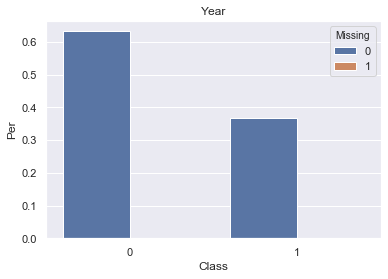

Class


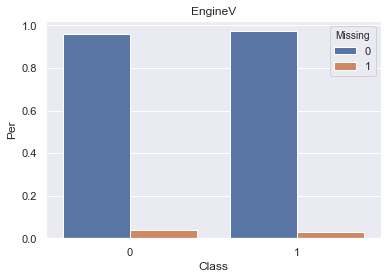

Class


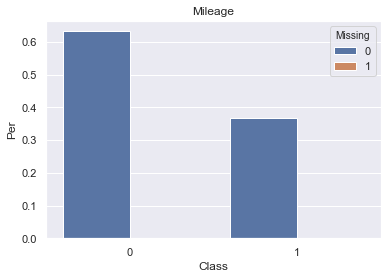

In [136]:
 for var in cont_vars:
    analyze_na_values(df, var, 'Class')

### 6.2.1. Removing rows with missing values

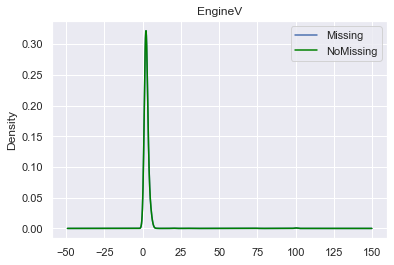

In [137]:
no_missing_df = df.copy()
no_missing_df = no_missing_df.dropna(subset=['EngineV'],axis=0)

# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

for var in ['EngineV']:
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # original variable distribution
    df[var].plot(kind='kde', ax=ax)

    # variable imputed with the mean
    no_missing_df[var].plot(kind='kde', ax=ax, color='green')

    # add legends
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, ['Missing','NoMissing'], loc='best')
    plt.title(var)

### 6.2.2. Replacing NA with mean/median/random

In [138]:
df = bk_df.copy()

for var in cont_vars:
    df[var+'_median'] = df[var].fillna(df[var].median())
    df[var+'_mean'] = df[var].fillna(df[var].mean())
    random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
    random_sample.index = df[df[var].isnull()].index
    # replace the NA in the newly created variable
    df[var+'_random'] = df[var].copy()
    df.loc[df[var].isnull(), var+'_random'] = random_sample

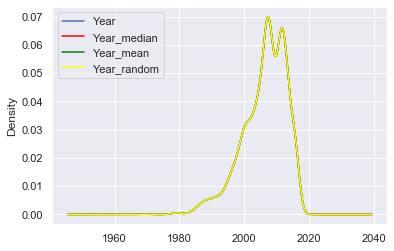

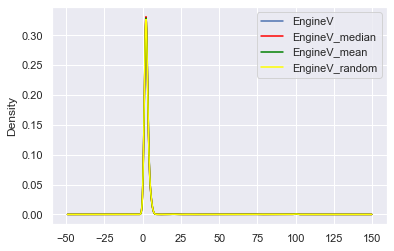

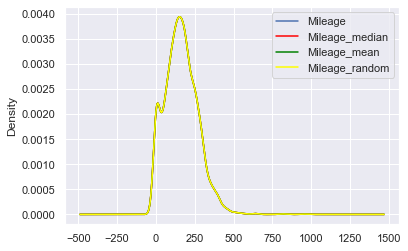

In [139]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

for var in cont_vars:
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # original variable distribution
    df[var].plot(kind='kde', ax=ax)

    # variable imputed with the median
    df[var+'_median'].plot(kind='kde', ax=ax, color='red')

    # variable imputed with the mean
    df[var+'_mean'].plot(kind='kde', ax=ax, color='green')

    # variable imputed with the mean
    df[var+'_random'].plot(kind='kde', ax=ax, color='yellow')

    # add legends
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

### 6.2.n. Fixing missing values

#### Replace by mean

#### Replace by median

#### Replace by random

#### Remove

In [141]:
bk_df = df.copy()

print('Original shape: ', df.shape)
df = df.dropna(axis=0)
print('After removing data: ', df.shape)

df = df.reset_index(drop=True)
bk_df1 = df.copy()

Original shape:  (4173, 18)
After removing data:  (4025, 18)


### Recheck statistics tests

In [142]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df.sort_values(['abs_tstats'], ascending = False)

,Feature,t-stats,p-value,abs_tstats
0,Year,-40.4355,2.72294e-300,40.4355
2,Mileage,36.2559,2.61373e-249,36.2559
1,EngineV,-2.45385,0.0141755,2.45385


## 6.3. Train model without preprocessing

In [144]:
df = df.reset_index(drop = True)
num_df = df[cont_vars]
cat_df = pd.DataFrame()
Predictive_Model(num_df, cat_df, target)

Optimization terminated successfully.
         Current function value: 0.438662
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3018
Model:                          Logit   Df Residuals:                     3014
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.3344
Time:                        07:33:43   Log-Likelihood:                -1323.9
converged:                       True   LL-Null:                       -1988.9
Covariance Type:            nonrobust   LLR p-value:                4.430e-288
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0378      0.059    -17.571      0.000      -1.154      -0.922
Year           1.5780      0.

In [146]:
Model_Selection(df, cont_vars)

KNN: 0.856874 (0.016026)
SVC: 0.778995 (0.016130)
LSVC: 0.827376 (0.011981)
LR: 0.772036 (0.013372)
DT: 0.870132 (0.022460)
GNB: 0.729294 (0.018333)
RF: 0.892662 (0.018842)
GB: 0.892991 (0.015524)
LGB: 0.897634 (0.020635)
ADA: 0.883377 (0.015453)
QDA: 0.728291 (0.021334)
NN: 0.858856 (0.016301)
XGB: 0.896305 (0.015246)


In [148]:
ModelEvaluation(df, cont_vars)

KNN
Train set
Accuracy:  0.9035785288270378
ROC AUC Score:  0.8918933492573528
Confusion matrix
Predicted     0    1
True                
0          1781  120
1           171  946
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1901
           1       0.89      0.85      0.87      1117

    accuracy                           0.90      3018
   macro avg       0.90      0.89      0.90      3018
weighted avg       0.90      0.90      0.90      3018

----------------------------------------------------------
Test set
Accuracy:  0.8570009930486594
ROC AUC Score:  0.8389771737383817
Confusion matrix
Predicted    0    1
True               
0          576   58
1           86  287
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       634
           1       0.83      0.77      0.80       373

    accuracy                           0.86      1007
   macro avg       0.85      0.84      0.84  

Train set
Accuracy:  0.9165009940357853
ROC AUC Score:  0.9115661219628552
Confusion matrix
Predicted     0    1
True                
0          1769  132
1           120  997
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1901
           1       0.88      0.89      0.89      1117

    accuracy                           0.92      3018
   macro avg       0.91      0.91      0.91      3018
weighted avg       0.92      0.92      0.92      3018

----------------------------------------------------------
Test set
Accuracy:  0.8987090367428004
ROC AUC Score:  0.8908627295100684
Confusion matrix
Predicted    0    1
True               
0          584   50
1           52  321
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       634
           1       0.87      0.86      0.86       373

    accuracy                           0.90      1007
   macro avg       0.89      0.89      0.89      

#### Visualize TSN

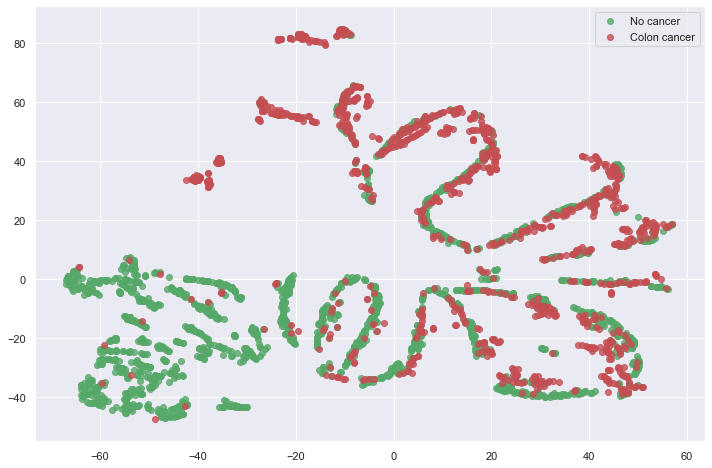

In [150]:
tsne_plot(df, cont_vars)

## 6.4. Treating outliers

In [151]:
df = bk_df1.copy()

In [152]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [153]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [154]:
df.shape

(4025, 18)

### 6.4.1. Remove outliers

#### Year

Skewness: -0.963945
Kurtosis: 0.999387


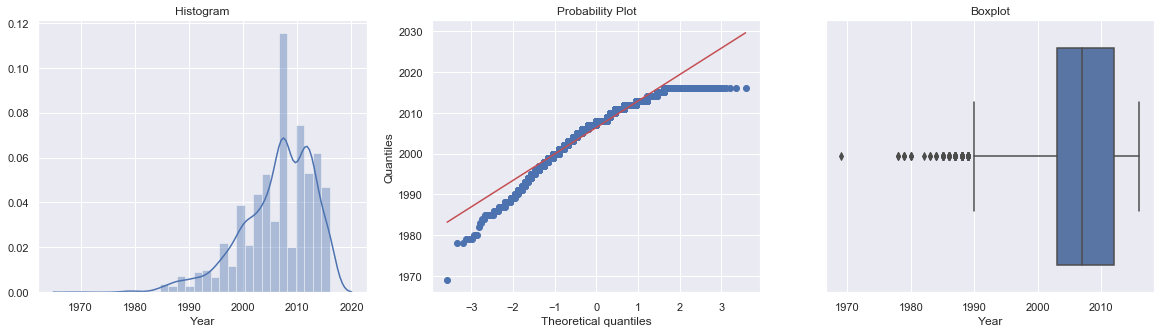

In [155]:
analyse_continuous(df,'Year',target)

In [156]:
# calculate boundaries for Year
upper_boundary, lower_boundary = find_normal_boundaries(df, 'Year')
upper_boundary, lower_boundary

(2026.46641322036, 1986.292841438025)

In [157]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(df[df['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Year'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary]) / len(df)))

total number of Year: 4025
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 38

% right end outliers: 0.0
% left end outliers: 0.009440993788819876


In [158]:
df = df[(df.Year < upper_boundary) & (df.Year > lower_boundary)]
df = df.reset_index(drop=True)
df.shape

(3987, 18)

Skewness: -0.762869
Kurtosis: 0.201604


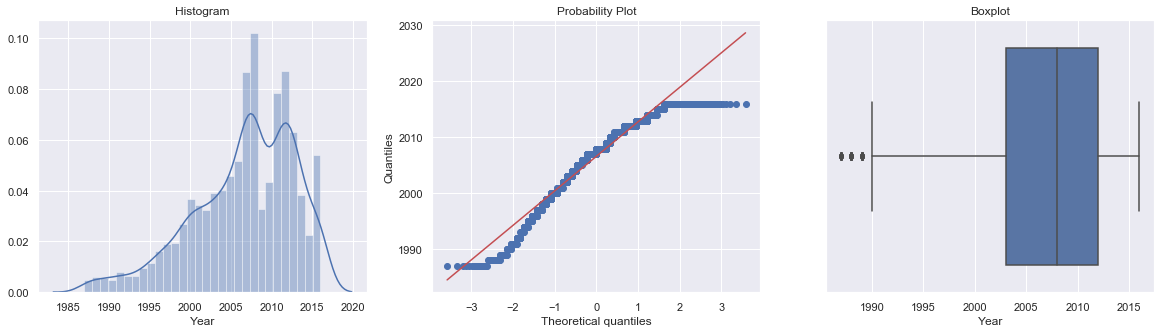

In [159]:
analyse_continuous(df,'Year',target)

#### Mileage

Skewness: 0.706495
Kurtosis: 1.868399


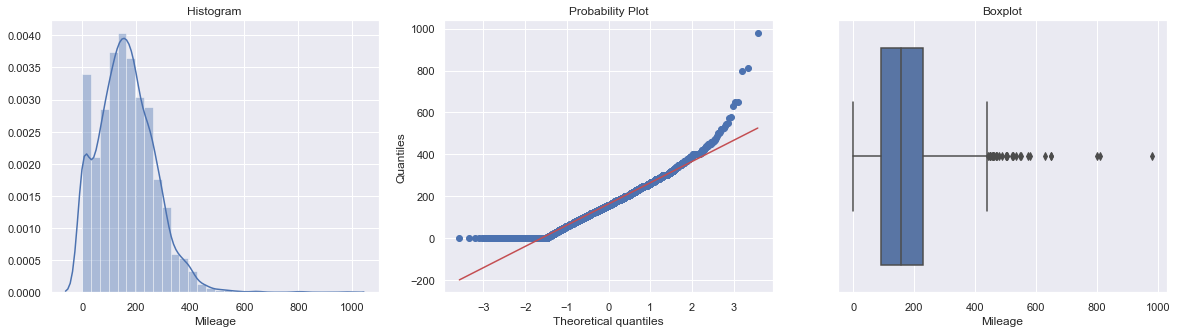

In [160]:
analyse_continuous(df,'Mileage',target)

In [161]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [162]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Mileage'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary]) / len(df)))

total number of Year: 3987
cars with more than upper_boundary of Mileage (right end outliers): 14
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.003511412089290193
% left end outliers: 0.0


In [163]:
df = df[(df.Mileage < upper_boundary) & (df.Mileage > lower_boundary)]
df = df.reset_index(drop = True)
df.shape

(3973, 18)

Skewness: 0.368103
Kurtosis: -0.178503


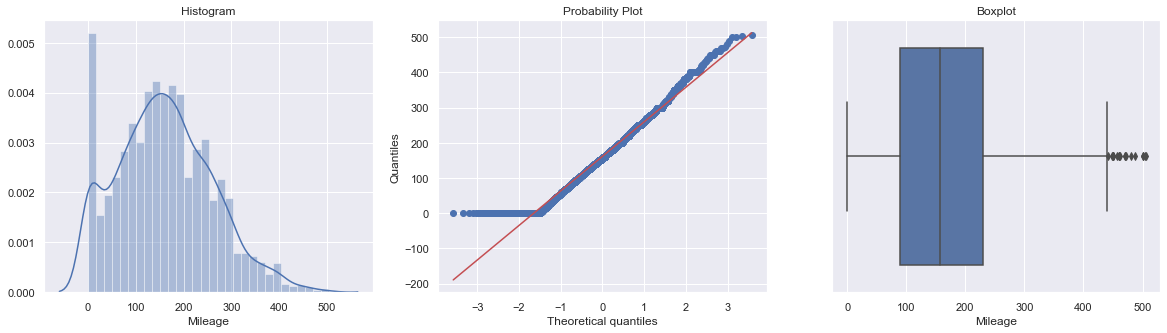

In [164]:
analyse_continuous(df,'Mileage',target)

#### EngineV

Skewness: 17.049629
Kurtosis: 312.213441


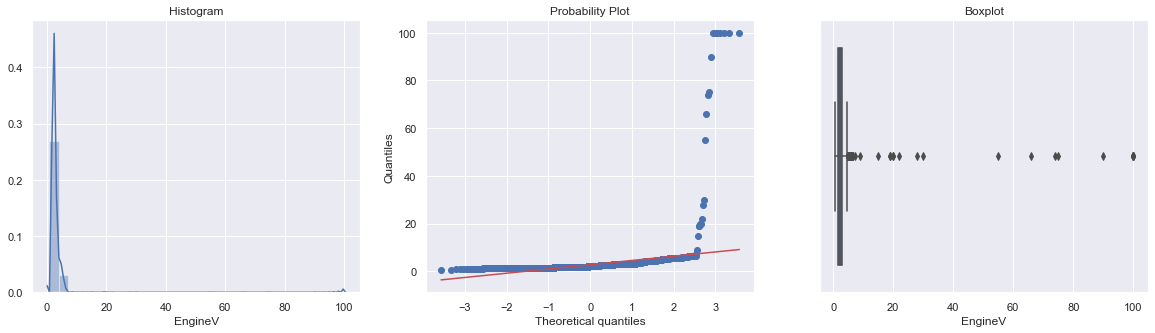

In [165]:
analyse_continuous(df,'EngineV',target)

In [166]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [167]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['EngineV'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary]) / len(df)))

total number of Year: 3973
cars with more than upper_boundary of Mileage (right end outliers): 20
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.005033979360684621
% left end outliers: 0.0


In [168]:
df = df[(df.EngineV < upper_boundary) & (df.EngineV > lower_boundary)]
df = df.reset_index()
df.shape

(3952, 19)

Skewness: 1.492797
Kurtosis: 2.256621


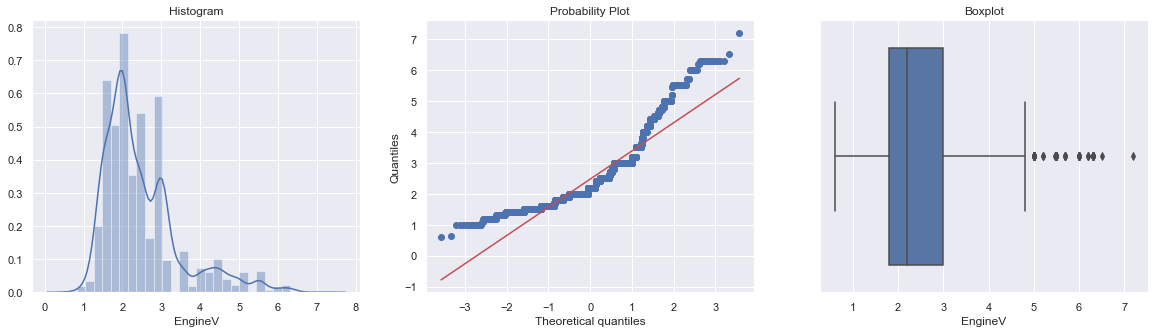

In [169]:
analyse_continuous(df,'EngineV',target)

#### Training model

In [170]:
df = df.reset_index(drop = True)
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

Optimization terminated successfully.
         Current function value: 0.278342
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 2964
Model:                          Logit   Df Residuals:                     2960
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.5795
Time:                        07:38:00   Log-Likelihood:                -825.00
converged:                       True   LL-Null:                       -1962.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4403      0.086    -16.791      0.000      -1.608      -1.272
Mileage       -0.7576      0.

In [171]:
Training_Preparation(df, cont_vars)

KNN: 0.878210 (0.014543)
SVC: 0.875175 (0.022393)
LSVC: 0.883271 (0.020978)
LR: 0.872817 (0.023061)
DT: 0.866064 (0.016853)
GNB: 0.830642 (0.021421)
RF: 0.890031 (0.013107)
GB: 0.898117 (0.013686)
LGB: 0.891710 (0.011631)
ADA: 0.887655 (0.009974)
QDA: 0.863707 (0.018430)
NN: 0.885300 (0.022856)
XGB: 0.894739 (0.014530)


In [172]:
ModelEvaluation(df, cont_vars)

KNN
Train set
Accuracy:  0.9176788124156545
ROC AUC Score:  0.9092338298801496
Confusion matrix
Predicted     0    1
True                
0          1745  105
1           139  975
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1850
           1       0.90      0.88      0.89      1114

    accuracy                           0.92      2964
   macro avg       0.91      0.91      0.91      2964
weighted avg       0.92      0.92      0.92      2964

----------------------------------------------------------
Test set
Accuracy:  0.8846153846153846
ROC AUC Score:  0.8807506978816726
Confusion matrix
Predicted    0    1
True               
0          553   64
1           50  321
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       617
           1       0.83      0.87      0.85       371

    accuracy                           0.88       988
   macro avg       0.88      0.88      0.88  

Train set
Accuracy:  0.9153171390013495
ROC AUC Score:  0.9109131932650782
Confusion matrix
Predicted     0    1
True                
0          1718  132
1           119  995
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1850
           1       0.88      0.89      0.89      1114

    accuracy                           0.92      2964
   macro avg       0.91      0.91      0.91      2964
weighted avg       0.92      0.92      0.92      2964

----------------------------------------------------------
Test set
Accuracy:  0.9058704453441295
ROC AUC Score:  0.9026045511932794
Confusion matrix
Predicted    0    1
True               
0          565   52
1           41  330
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       617
           1       0.86      0.89      0.88       371

    accuracy                           0.91       988
   macro avg       0.90      0.90      0.90      

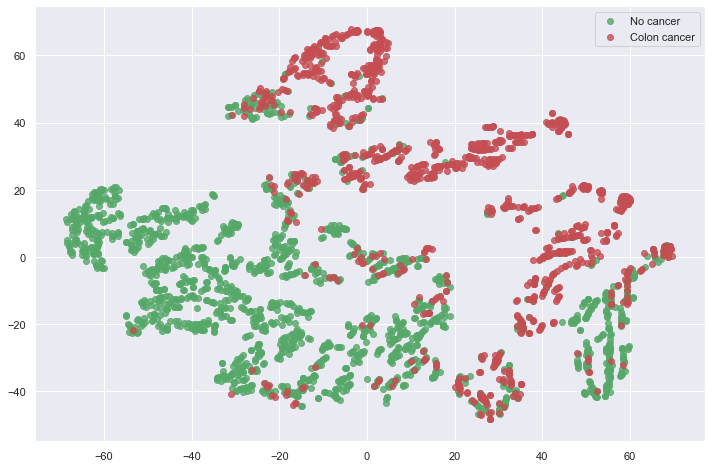

In [173]:
tsne_plot(df, cont_vars)

### 6.4.2. Top-coding, End-coding

In [66]:
df = df_bk1.copy()

### 6.4.3. Disertaion

## 6.5. Gaussian Transformation

In [ ]:
df = df_bk1.copy()

### 6.5.1. Log Transform

#### Transform independent vars to have Normal distribution

Skewness: 0.563818
Kurtosis: 0.065022


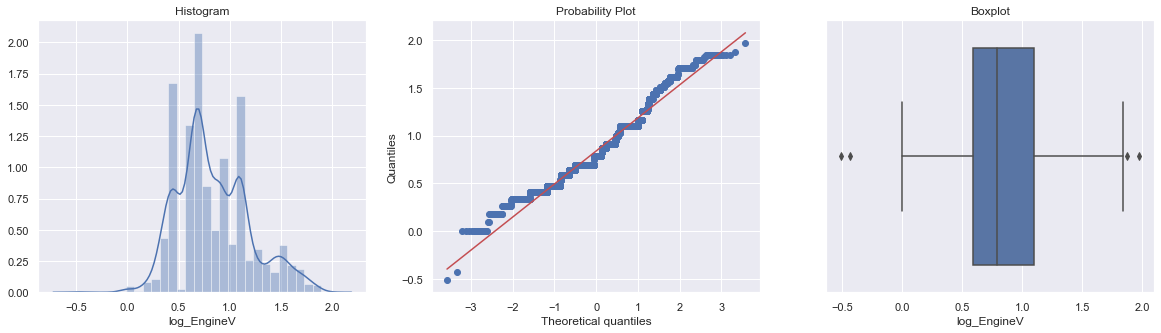

In [174]:
df['log_EngineV'] = np.log(df['EngineV'])
analyse_continuous(df,'log_EngineV',target)

Skewness: -0.770464
Kurtosis: 0.225049


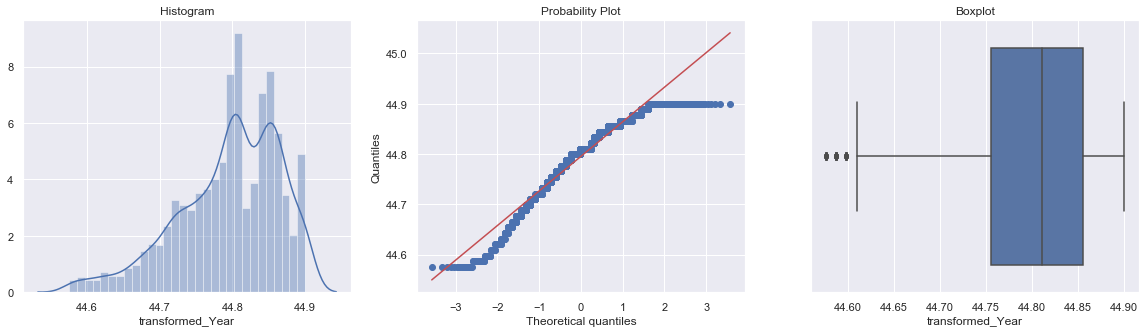

In [175]:
df['transformed_Year'] = df.Year**(1/2)
analyse_continuous(df,'transformed_Year',target)

In [178]:
cont_vars  = ['transformed_Year','Mileage','log_EngineV']
num_df = df[cont_vars]
cat_df = pd.DataFrame()

Training_Preparation(df, cont_vars)

KNN: 0.883942 (0.014387)
SVC: 0.884287 (0.022121)
LSVC: 0.881923 (0.017346)
LR: 0.881249 (0.022421)
DT: 0.869102 (0.017223)
GNB: 0.830304 (0.026845)
RF: 0.884632 (0.012800)
GB: 0.897443 (0.014048)
LGB: 0.892048 (0.011874)
ADA: 0.887655 (0.009974)
QDA: 0.873149 (0.021055)
NN: 0.883949 (0.020797)
XGB: 0.894739 (0.014530)


In [179]:
num_vars  = ['Year','Mileage','log_EngineV']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Training_Preparation(df, cont_vars)

KNN: 0.883942 (0.014387)
SVC: 0.884287 (0.022121)
LSVC: 0.881923 (0.017346)
LR: 0.881249 (0.022421)
DT: 0.866742 (0.019301)
GNB: 0.830304 (0.026845)
RF: 0.885980 (0.012823)
GB: 0.897443 (0.014048)
LGB: 0.892048 (0.011874)
ADA: 0.887655 (0.009974)
QDA: 0.873149 (0.021055)
NN: 0.882262 (0.022087)
XGB: 0.894739 (0.014530)


### 6.5.2. Other transformation

In [180]:
df_bk2 = df.copy()

# 7. Engineering categorical vars

In [181]:
df[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4


## 7.1. Engineering mixed vars

https://www.geeksforgeeks.org/python-extract-numbers-from-string/

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


In [220]:
df = df_bk2.copy()

In [221]:
print(len(df.Model.unique()))
df.Model.unique()

301


array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Hilux', 'Polo', 'Outlander',
       'A8', 'Touareg', 'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5',
       'Caddy', 'Camry', '528', 'TT', 'G 55 AMG', 'X6', 'Galant', '525',
       'Kangoo', 'ML 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer',
       'E-Class', 'Scenic', '330', 'Passat B5', 'A3',
       'Land Cruiser Prado', 'Caravelle', 'Avensis', 'GL 320', 'GL 450',
       'Lancer X', '200', '520', 'Tiguan', 'Outlander XL', 'GLS 350',
       'A5', 'X6 M', 'Golf III', 'A 150', 'FJ Cruiser', 'Koleos',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240', 'I3',
       'Multivan', 'Vaneo', 'X1', 'T5 (Transporter) ', 'S 400', 'S 550',
       'Passat CC', 'A4 Allroad', 'Pas

### 7.1.1. Create dummy vars for all labels without removing first var

In [222]:
dummy_df = pd.get_dummies(df.Model, drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3952, 300)


,100,11,116,118,120,19,190,200,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,428,4Runner,5,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,730,735,740,745,750,760,80,9,90,A 140,A 150,A 170,A 180,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 170,B 180,B 200,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 180,CLC 200,CLK 200,CLK 220,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 400,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 350,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLK 300,GLS 350,GLS 400,GLS 500,GLS 63,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Logan,Lupo,M5,M6,MB,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 430,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Previa,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 250,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 550,S 600,S 63 AMG,S 65 AMG,S-Guard,S4,S5,S8,SL 500 (550),SL 55 AMG,SLK 200,SLK 350,Sandero,Sandero StepWay,Scenic,Scion,Scirocco,Sequoia,Sharan,Sienna,Smart,Space Star,Space Wagon,Sprinter,Sprinter 208,Sprinter 210,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 316,Sprinter 318,Sprinter 319,Sprinter 324,Symbol,Syncro,T3 (Transporter),T4 (Transporter),T4 (Transporter),T5 (Transporter),T5 (Transporter),T6 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [224]:
num_df = pd.DataFrame()

In [225]:
Model_Selection(num_df, cat_df, target)

KNN: 0.806671 (0.018709)
SVC: 0.821851 (0.021113)
LSVC: 0.816793 (0.024189)
LR: 0.821851 (0.021113)
DT: 0.821851 (0.021113)
GNB: 0.767189 (0.052001)
RF: 0.821178 (0.022169)
GB: 0.768562 (0.023919)
LGB: 0.721663 (0.022969)
ADA: 0.768561 (0.026205)
QDA: 0.736855 (0.032515)
NN: 0.825907 (0.018614)
XGB: 0.748653 (0.022981)


In [226]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.8255735492577598
ROC AUC Score:  0.796880489106701
Confusion matrix
Predicted     0    1
True                
0          1688  162
1           355  759
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1850
           1       0.82      0.68      0.75      1114

    accuracy                           0.83      2964
   macro avg       0.83      0.80      0.81      2964
weighted avg       0.83      0.83      0.82      2964

----------------------------------------------------------
Test set
Accuracy:  0.8026315789473685
ROC AUC Score:  0.7678249245326705
Confusion matrix
Predicted    0    1
True               
0          560   57
1          138  233
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       617
           1       0.80      0.63      0.70       371

    accuracy                           0.80       988
   macro avg       0.80      0.77      0.78   

Train set
Accuracy:  0.7834008097165992
ROC AUC Score:  0.7200630792372265
Confusion matrix
Predicted     0    1
True                
0          1804   46
1           596  518
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1850
           1       0.92      0.46      0.62      1114

    accuracy                           0.78      2964
   macro avg       0.84      0.72      0.73      2964
weighted avg       0.81      0.78      0.76      2964

----------------------------------------------------------
Test set
Accuracy:  0.7773279352226721
ROC AUC Score:  0.7121014211011459
Confusion matrix
Predicted    0    1
True               
0          601   16
1          204  167
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       617
           1       0.91      0.45      0.60       371

    accuracy                           0.78       988
   macro avg       0.83      0.71      0.72      

In [229]:
num_df = df[cont_vars]
Model_Selection(num_df, cat_df, target)

KNN: 0.911266 (0.013608)
SVC: 0.936912 (0.012619)
LSVC: 0.897090 (0.021492)
LR: 0.937919 (0.013512)
DT: 0.921386 (0.013849)
GNB: 0.779668 (0.058142)
RF: 0.936571 (0.014128)
GB: 0.923757 (0.013639)
LGB: 0.920383 (0.016019)
ADA: 0.920030 (0.013050)
QDA: 0.712186 (0.036771)
NN: 0.931512 (0.016450)
XGB: 0.919369 (0.012637)


In [230]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.9399460188933874
ROC AUC Score:  0.93439274103547
Confusion matrix
Predicted     0     1
True                 
0          1770    80
1            98  1016
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1850
           1       0.93      0.91      0.92      1114

    accuracy                           0.94      2964
   macro avg       0.94      0.93      0.94      2964
weighted avg       0.94      0.94      0.94      2964

----------------------------------------------------------
Test set
Accuracy:  0.9311740890688259
ROC AUC Score:  0.9266252233439782
Confusion matrix
Predicted    0    1
True               
0          583   34
1           34  337
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       617
           1       0.91      0.91      0.91       371

    accuracy                           0.93       988
   macro avg       0.93      0.93      0.93

Train set
Accuracy:  0.9470310391363023
ROC AUC Score:  0.9409612305303507
Confusion matrix
Predicted     0     1
True                 
0          1786    64
1            93  1021
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1850
           1       0.94      0.92      0.93      1114

    accuracy                           0.95      2964
   macro avg       0.95      0.94      0.94      2964
weighted avg       0.95      0.95      0.95      2964

----------------------------------------------------------
Test set
Accuracy:  0.944331983805668
ROC AUC Score:  0.9409214222369783
Confusion matrix
Predicted    0    1
True               
0          589   28
1           27  344
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       617
           1       0.92      0.93      0.93       371

    accuracy                           0.94       988
   macro avg       0.94      0.94      0.94   

### 7.1.2. Extract numerical part and categorical part

In [231]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

df['Model_categorical'] = df.Model.apply(lambda x:LetterPart_Extraction(x))
df['Model_numerical'] = df.Model.apply(lambda x:NumberPart_Extraction(x))
df.head(5)

,index,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_median,Year_mean,Year_random,EngineV_median,EngineV_mean,EngineV_random,Mileage_median,Mileage_mean,Mileage_random,log_EngineV,transformed_Year,Model_categorical,Model_numerical
0,0,BMW,sedan,277,2.0,Petrol,yes,1991,320,0,1991,1991,1991,2.0,2.0,2.0,277,277,277,0.693147,44.620623,,320
1,1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,1999,1999,1999,2.9,2.9,2.9,427,427,427,1.064711,44.710178,Sprinter,212
2,2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,0,2003,2003,2003,5.0,5.0,5.0,358,358,358,1.609438,44.754888,S,500
3,3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,1,2007,2007,2007,4.2,4.2,4.2,240,240,240,1.435085,44.799554,Q,7
4,4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,1,2011,2011,2011,2.0,2.0,2.0,120,120,120,0.693147,44.844175,Rav,4


In [232]:
print(len(df.Model_categorical.unique()))
df.Model_categorical.unique()

153


array(['', 'Sprinter', 'S', 'Q', 'Rav', 'GLS', 'A', 'Megane', 'GolfIV',
       'AAllroad', 'PassatB', 'LandCruiser', 'Clio', 'Hilux', 'Polo',
       'Outlander', 'Touareg', 'Vito', 'Colt', 'Z', 'PajeroWagon', 'X',
       'Caddy', 'Camry', 'TT', 'GAMG', 'Galant', 'Kangoo', 'ML', 'Trafic',
       'XM', 'Lancer', 'EClass', 'Scenic', 'LandCruiserPrado',
       'Caravelle', 'Avensis', 'GL', 'LancerX', 'Tiguan', 'OutlanderXL',
       'GolfIII', 'FJCruiser', 'Koleos', 'Scirocco', 'M', 'Venza', 'V',
       'CClass', 'Lupo', 'Series', 'CLA', 'TTransporter', 'Highlander',
       'Corolla', 'CLK', 'I', 'Multivan', 'Vaneo', 'PassatCC', 'GolfII',
       'L', 'Jetta', 'Logan', 'PajeroSport', 'LancerXSportback',
       'GolfPlus', 'Up', 'Amarok', 'G', 'Auris', 'CL', 'Master', 'Dokker',
       'GolfVI', 'GolfVII', 'Laguna', 'NewBeetle', 'Pajero', 'Viano',
       'Sharan', 'Prius', 'B', 'Fluence', 'Duster', 'Hiace', 'CLC',
       'GolfV', 'Fortuner', 'LT', 'Symbol', 'Yaris', 'Espace',
       'GolfVaria

In [233]:
df['Model_numerical'] = df['Model_numerical'].replace('',-1)
df['Model_numerical'] = df['Model_numerical'].astype(float)
df['Model_categorical'] = df['Model_categorical'].replace('',np.NaN)

### 7.1.3. Other approaches

## 7.2. Handling missing value

In [234]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' and var != target]

df[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model,Model_categorical
0,BMW,sedan,Petrol,yes,320,NaN
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,Sprinter
2,Mercedes-Benz,sedan,Gas,yes,S 500,S
3,Audi,crossover,Petrol,yes,Q7,Q
4,Toyota,crossover,Petrol,yes,Rav 4,Rav


In [235]:
miss_val_df = pd.DataFrame(df[cat_vars].isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * df[cat_vars].isnull().sum()/len(df[cat_vars])
miss_val_df = miss_val_df.sort_values('Percentage', ascending=False)
miss_val_df

,Count,Percentage
Model_categorical,477,12.069838
Brand,0,0.000000
Body,0,0.000000
Engine Type,0,0.000000
Registration,0,0.000000
Model,0,0.000000


Class


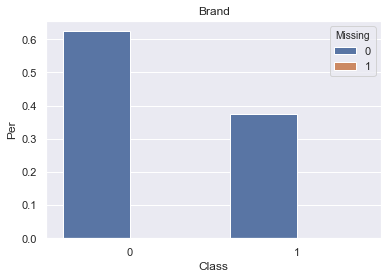

Class


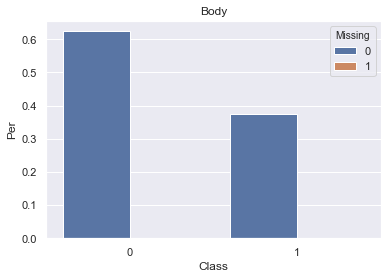

Class


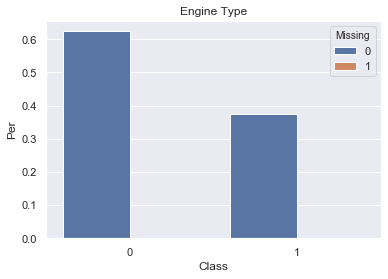

Class


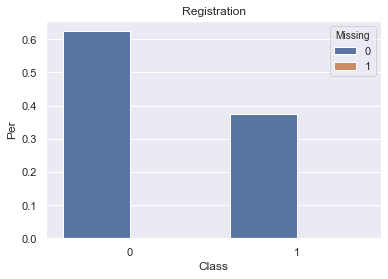

Class


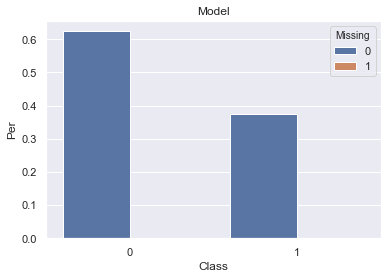

Class


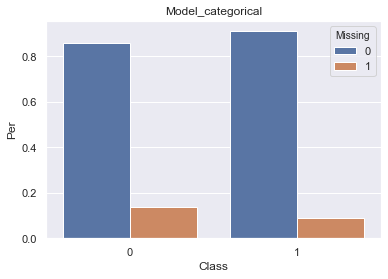

In [236]:
 for var in cat_vars:
    analyze_na_values(df, var, 'Class')

### 7.2.1. Filling NA with 'Missing'

In [237]:
df['Model_categorical'] = df['Model_categorical'].fillna('Missing')
df['Model_categorical'].unique()

array(['Missing', 'Sprinter', 'S', 'Q', 'Rav', 'GLS', 'A', 'Megane',
       'GolfIV', 'AAllroad', 'PassatB', 'LandCruiser', 'Clio', 'Hilux',
       'Polo', 'Outlander', 'Touareg', 'Vito', 'Colt', 'Z', 'PajeroWagon',
       'X', 'Caddy', 'Camry', 'TT', 'GAMG', 'Galant', 'Kangoo', 'ML',
       'Trafic', 'XM', 'Lancer', 'EClass', 'Scenic', 'LandCruiserPrado',
       'Caravelle', 'Avensis', 'GL', 'LancerX', 'Tiguan', 'OutlanderXL',
       'GolfIII', 'FJCruiser', 'Koleos', 'Scirocco', 'M', 'Venza', 'V',
       'CClass', 'Lupo', 'Series', 'CLA', 'TTransporter', 'Highlander',
       'Corolla', 'CLK', 'I', 'Multivan', 'Vaneo', 'PassatCC', 'GolfII',
       'L', 'Jetta', 'Logan', 'PajeroSport', 'LancerXSportback',
       'GolfPlus', 'Up', 'Amarok', 'G', 'Auris', 'CL', 'Master', 'Dokker',
       'GolfVI', 'GolfVII', 'Laguna', 'NewBeetle', 'Pajero', 'Viano',
       'Sharan', 'Prius', 'B', 'Fluence', 'Duster', 'Hiace', 'CLC',
       'GolfV', 'Fortuner', 'LT', 'Symbol', 'Yaris', 'Espace',
       'Go

### 7.2.2. Other approaches

## 7.3. High cardinality

In [238]:
dummy_df = pd.get_dummies(df.Model_categorical, drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3952, 152)


,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,Logan,Lupo,M,MB,ML,MLAMG,MarkII,Master,Matrix,Megane,Missing,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SGuard,SL,SLAMG,SLK,Sandero,SanderoStepWay,Scenic,Scion,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,Smart,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
selected_list = ['Model_categorical']
def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(df, var))
    print()

Missing             0.120698
A                   0.071609
PassatB             0.050860
EClass              0.046306
X                   0.042763
Vito                0.039474
TTransporter        0.037955
Kangoo              0.033401
Camry               0.032136
S                   0.031123
Caddy               0.027834
Megane              0.021508
Q                   0.019231
LandCruiserPrado    0.018978
Trafic              0.017966
Touareg             0.016447
LandCruiser         0.015182
Polo                0.014929
CClass              0.013158
Rav                 0.012652
LancerX             0.012399
Lancer              0.012399
Corolla             0.012146
PajeroWagon         0.012146
ML                  0.011134
Jetta               0.010374
Sprinter            0.008856
Avensis             0.007338
Auris               0.007085
Outlander           0.006832
GLS                 0.006832
Laguna              0.006832
Galant              0.006832
AAllroad            0.006579
GL            

In [241]:
Model_Selection(num_df, cat_df, target)

KNN: 0.921391 (0.012691)
SVC: 0.944327 (0.015779)
LSVC: 0.915645 (0.012944)
LR: 0.942301 (0.014667)
DT: 0.915984 (0.016653)
GNB: 0.600843 (0.028927)
RF: 0.937240 (0.013014)
GB: 0.927462 (0.012826)
LGB: 0.928138 (0.015818)
ADA: 0.919356 (0.012088)
QDA: 0.580277 (0.023540)
NN: 0.936904 (0.014332)
XGB: 0.924088 (0.013776)


In [242]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.9463562753036437
ROC AUC Score:  0.94381338250279
Confusion matrix
Predicted     0     1
True                 
0          1765    85
1            74  1040
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1850
           1       0.92      0.93      0.93      1114

    accuracy                           0.95      2964
   macro avg       0.94      0.94      0.94      2964
weighted avg       0.95      0.95      0.95      2964

----------------------------------------------------------
Test set
Accuracy:  0.9210526315789473
ROC AUC Score:  0.9206708401228447
Confusion matrix
Predicted    0    1
True               
0          569   48
1           30  341
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       617
           1       0.88      0.92      0.90       371

    accuracy                           0.92       988
   macro avg       0.91      0.92      0.92

Train set
Accuracy:  0.9453441295546559
ROC AUC Score:  0.9401455674705226
Confusion matrix
Predicted     0     1
True                 
0          1778    72
1            90  1024
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1850
           1       0.93      0.92      0.93      1114

    accuracy                           0.95      2964
   macro avg       0.94      0.94      0.94      2964
weighted avg       0.95      0.95      0.95      2964

----------------------------------------------------------
Test set
Accuracy:  0.9392712550607287
ROC AUC Score:  0.9363322222562002
Confusion matrix
Predicted    0    1
True               
0          585   32
1           28  343
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       617
           1       0.91      0.92      0.92       371

    accuracy                           0.94       988
   macro avg       0.93      0.94      0.94  

## 7.4. Rare values

### 7.4.1. Group rare values under new label

In [243]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(df, variable):
    
    # find the most frequent category
    frequent_cat = df.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = df.groupby([variable])[variable].count()/np.float(len(df))
    rare_cat = [x for x in temp.loc[temp<0.01].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    df[variable+'_freq_imp'] = np.where(df[variable].isin(rare_cat), frequent_cat, df[variable])
    
    # by adding a new label 'Rare'
    df[variable+'_rare_imp'] = np.where(df[variable].isin(rare_cat), 'Rare', df[variable])

In [244]:
# impute rare labels
rare_imputation(df, 'Model_categorical')

# visualise the transformed dataset
df[['Model_categorical', 'Model_categorical_rare_imp', 'Model_categorical_freq_imp']].head(10)

,Model_categorical,Model_categorical_rare_imp,Model_categorical_freq_imp
0,Missing,Missing,Missing
1,Sprinter,Rare,Missing
2,S,S,S
3,Q,Q,Q
4,Rav,Rav,Rav
5,GLS,Rare,Missing
6,Missing,Missing,Missing
7,A,A,A
8,Megane,Megane,Megane
9,GolfIV,Rare,Missing


In [245]:
len(df.Model_categorical_rare_imp.unique())

27

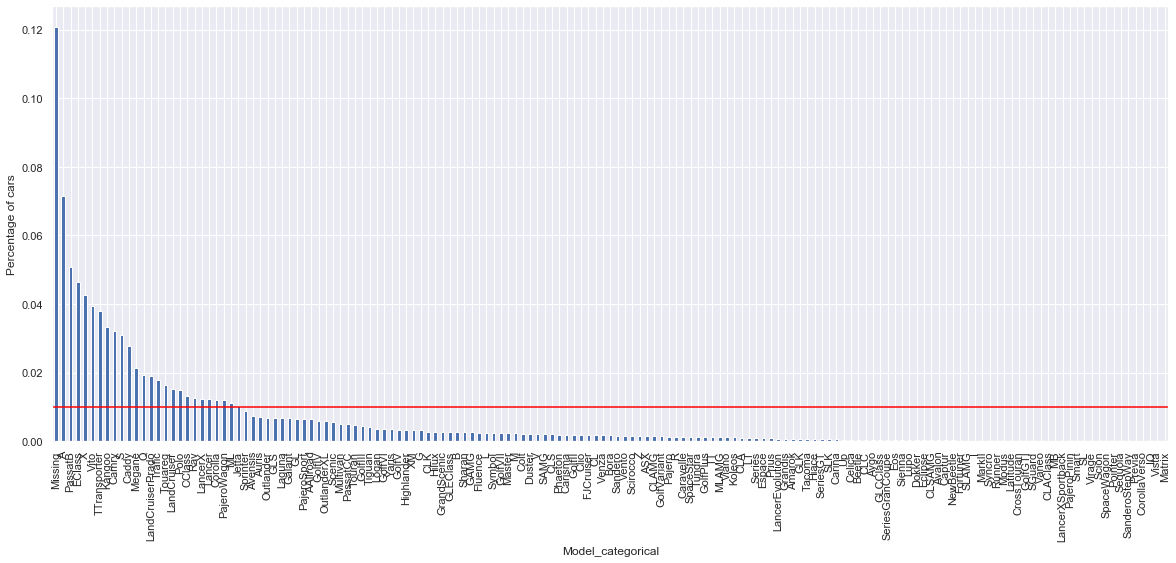

In [246]:
total_cars = len(df)
selected_list = ['Model_categorical']

# for each categorical variable
for col in selected_list:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(df[col].value_counts() / total_cars)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize = (20,8))
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('Percentage of cars')
    plt.show()

In [247]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.01].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [248]:
# group rare labels in Neighborhood

df['Model_categorical_grouped'] = group_rare_labels(df, 'Model_categorical')

df[['Model_categorical', 'Model_categorical_grouped']].head(10)

,Model_categorical,Model_categorical_grouped
0,Missing,Missing
1,Sprinter,rare
2,S,S
3,Q,Q
4,Rav,Rav
5,GLS,rare
6,Missing,Missing
7,A,A
8,Megane,Megane
9,GolfIV,rare


In [250]:
df.Model_categorical_grouped.nunique()

27

In [251]:
dummy_df = pd.get_dummies(df[['Model_categorical_grouped']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3952, 26)


,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_Missing,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [252]:
Predictive_Model(num_df, cat_df, target)

         Current function value: 0.178873
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 2964
Model:                          Logit   Df Residuals:                     2934
Method:                           MLE   Df Model:                           29
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.7298
Time:                        08:12:26   Log-Likelihood:                -530.18
converged:                      False   LL-Null:                       -1962.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.9524   3.67e+06  -1.08e-06     

In [253]:
Model_Selection(num_df, cat_df, target)

KNN: 0.922739 (0.014175)
SVC: 0.923419 (0.015286)
LSVC: 0.919025 (0.013578)
LR: 0.922406 (0.014512)
DT: 0.904186 (0.018767)
GNB: 0.565421 (0.035584)
RF: 0.925448 (0.018384)
GB: 0.922739 (0.013187)
LGB: 0.928812 (0.015415)
ADA: 0.917679 (0.012630)
QDA: 0.574184 (0.040713)
NN: 0.932186 (0.014491)
XGB: 0.923409 (0.012388)


In [254]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.9439946018893387
ROC AUC Score:  0.9401358629724877
Confusion matrix
Predicted     0     1
True                 
0          1768    82
1            84  1030
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1850
           1       0.93      0.92      0.93      1114

    accuracy                           0.94      2964
   macro avg       0.94      0.94      0.94      2964
weighted avg       0.94      0.94      0.94      2964

----------------------------------------------------------
Test set
Accuracy:  0.917004048582996
ROC AUC Score:  0.9152800045433298
Confusion matrix
Predicted    0    1
True               
0          569   48
1           34  337
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       617
           1       0.88      0.91      0.89       371

    accuracy                           0.92       988
   macro avg       0.91      0.92      0.9

Train set
Accuracy:  0.9406207827260459
ROC AUC Score:  0.9352904071036925
Confusion matrix
Predicted     0     1
True                 
0          1770    80
1            96  1018
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1850
           1       0.93      0.91      0.92      1114

    accuracy                           0.94      2964
   macro avg       0.94      0.94      0.94      2964
weighted avg       0.94      0.94      0.94      2964

----------------------------------------------------------
Test set
Accuracy:  0.937246963562753
ROC AUC Score:  0.9347114767132504
Confusion matrix
Predicted    0    1
True               
0          583   34
1           28  343
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       617
           1       0.91      0.92      0.92       371

    accuracy                           0.94       988
   macro avg       0.93      0.93      0.93   

### 7.4.2. Other approaches

In [255]:
df_bk3 = df.copy()

## 7.5. Encode categorical vars

### 7.5.1. One-hot encoding

In [256]:
df = df_bk3.copy()

In [257]:
dummy_df = pd.get_dummies(df[['Brand','Engine Type','Body','Registration','Model_categorical_grouped']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3952, 41)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_Missing,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [258]:
Model_Selection(num_df, cat_df, target)

KNN: 0.910256 (0.016130)
SVC: 0.944001 (0.019110)
LSVC: 0.935222 (0.012677)
LR: 0.942984 (0.015390)
DT: 0.919036 (0.013854)
GNB: 0.678114 (0.029911)
RF: 0.943995 (0.013240)
GB: 0.936908 (0.009427)
LGB: 0.941973 (0.014271)
ADA: 0.926456 (0.013938)
QDA: 0.651487 (0.031994)
NN: 0.941300 (0.016638)
XGB: 0.935223 (0.012505)


In [259]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.9352226720647774
ROC AUC Score:  0.9325731476539377
Confusion matrix
Predicted     0     1
True                 
0          1745   105
1            87  1027
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1850
           1       0.91      0.92      0.91      1114

    accuracy                           0.94      2964
   macro avg       0.93      0.93      0.93      2964
weighted avg       0.94      0.94      0.94      2964

----------------------------------------------------------
Test set
Accuracy:  0.9149797570850202
ROC AUC Score:  0.9120472506301687
Confusion matrix
Predicted    0    1
True               
0          570   47
1           37  334
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       617
           1       0.88      0.90      0.89       371

    accuracy                           0.91       988
   macro avg       0.91      0.91      0.

Train set
Accuracy:  0.9568151147098516
ROC AUC Score:  0.9505846960065991
Confusion matrix
Predicted     0     1
True                 
0          1805    45
1            83  1031
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1850
           1       0.96      0.93      0.94      1114

    accuracy                           0.96      2964
   macro avg       0.96      0.95      0.95      2964
weighted avg       0.96      0.96      0.96      2964

----------------------------------------------------------
Test set
Accuracy:  0.9423076923076923
ROC AUC Score:  0.9393006766940285
Confusion matrix
Predicted    0    1
True               
0          587   30
1           27  344
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       617
           1       0.92      0.93      0.92       371

    accuracy                           0.94       988
   macro avg       0.94      0.94      0.94  

In [260]:
dummy_df = pd.get_dummies(df[['Brand','Engine Type','Body','Registration','Model_categorical']], drop_first=True)
cat_df = dummy_df.copy()
print(cat_df.shape)
cat_df.head()

(3952, 167)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes,Model_categorical_AAllroad,Model_categorical_ASX,Model_categorical_Amarok,Model_categorical_Auris,Model_categorical_Avalon,Model_categorical_Avensis,Model_categorical_Aygo,Model_categorical_B,Model_categorical_Beetle,Model_categorical_Bora,Model_categorical_CClass,Model_categorical_CL,Model_categorical_CLA,Model_categorical_CLAClass,Model_categorical_CLAMG,Model_categorical_CLC,Model_categorical_CLK,Model_categorical_CLS,Model_categorical_CLSAMG,Model_categorical_Caddy,Model_categorical_Camry,Model_categorical_Captur,Model_categorical_Caravelle,Model_categorical_Carina,Model_categorical_Carisma,Model_categorical_Celica,Model_categorical_Clio,Model_categorical_Colt,Model_categorical_Corolla,Model_categorical_CorollaVerso,Model_categorical_CrossTouran,Model_categorical_Dokker,Model_categorical_Duster,Model_categorical_EClass,Model_categorical_Eclipse,Model_categorical_Eos,Model_categorical_Espace,Model_categorical_FJCruiser,Model_categorical_Fluence,Model_categorical_Fortuner,Model_categorical_G,Model_categorical_GAMG,Model_categorical_GL,Model_categorical_GLCClass,Model_categorical_GLEClass,Model_categorical_GLK,Model_categorical_GLS,Model_categorical_Galant,Model_categorical_GolfGTI,Model_categorical_GolfII,Model_categorical_GolfIII,Model_categorical_GolfIV,Model_categorical_GolfPlus,Model_categorical_GolfV,Model_categorical_GolfVI,Model_categorical_GolfVII,Model_categorical_GolfVariant,Model_categorical_GrandScenic,Model_categorical_Grandis,Model_categorical_Hiace,Model_categorical_Highlander,Model_categorical_Hilux,Model_categorical_I,Model_categorical_IQ,Model_categorical_Jetta,Model_categorical_Kangoo,Model_categorical_Koleos,Model_categorical_L,Model_categorical_LT,Model_categorical_Laguna,Model_categorical_Lancer,Model_categorical_LancerEvolution,Model_categorical_LancerX,Model_categorical_LancerXSportback,Model_categorical_LandCruiser,Model_categorical_LandCruiserPrado,Model_categorical_Latitude,Model_categorical_Logan,Model_categorical_Lupo,Model_categorical_M,Model_categorical_MB,Model_categorical_ML,Model_categorical_MLAMG,Model_categorical_MarkII,Model_categorical_Master,Model_categorical_Matrix,Model_categorical_Megane,Model_categorical_Missing,Model_categorical_Modus,Model_categorical_Multivan,Model_categorical_NewBeetle,Model_categorical_Outlander,Model_categorical_OutlanderXL,Model_categorical_Pajero,Model_categorical_PajeroPinin,Model_categorical_PajeroSport,Model_categorical_PajeroWagon,Model_categorical_PassatB,Model_categorical_PassatCC,Model_categorical_Phaeton,Model_categorical_Pointer,Model_categorical_Polo,Model_categorical_Previa,Model_categorical_Prius,Model_categorical_Q,Model_categorical_R,Model_categorical_Rav,Model_categorical_Runner,Model_categorical_S,Model_categorical_SAMG,Model_categorical_SGuard,Model_categorical_SL,Model_categorical_SLAMG,Model_categorical_SLK,Model_categorical_Sandero,Model_categorical_SanderoStepWay,Model_categorical_Scenic,Model_categorical_Scion,Model_categorical_Scirocco,Model_categorical_Sequoia,Model_categorical_Series,Model_categorical_SeriesGT,Model_categorical_SeriesGranCoupe,Model_categorical_Sharan,Model_categorical_Sienna,Model_categorical_Smart,Model_categorical_SpaceStar,Model_categorical_SpaceWagon,Model_categorical_Sprinter,Model_categorical_Symbol,Model_categorical_Syncro,Model_categorical_TT,Model_categorical_TTransporter,Model_categorical_Tacoma,Model_categorical_Tiguan,Model_categorical_Touareg,Model_categorical_Touran,Model_categorical_Trafic,Model_categorical_Tundra,Model_categorical_Up,Model_categorical_V,Model_categorical_Vaneo,Model_categorical_Vento,Model_categorical_Venza,Model_categorical_Viano,Model_categorical_Virage,Model_categorical_Vista,Model_categorical_Vito,Model_categorical_X,Model_categorical_XM,Model_categorical_Yaris,Model_c

In [261]:
Model_Selection(num_df, cat_df, target)

KNN: 0.907216 (0.016649)
SVC: 0.948717 (0.015432)
LSVC: 0.920369 (0.011944)
LR: 0.947030 (0.015225)
DT: 0.920042 (0.009531)
GNB: 0.652104 (0.047697)
RF: 0.945002 (0.013423)
GB: 0.937582 (0.009809)
LGB: 0.944332 (0.012535)
ADA: 0.924767 (0.013647)
QDA: 0.613667 (0.037997)
NN: 0.936233 (0.014185)
XGB: 0.935222 (0.013881)


In [262]:
ModelEvaluation(num_df, cat_df, target)

KNN
Train set
Accuracy:  0.9338731443994602
ROC AUC Score:  0.9307778155174925
Confusion matrix
Predicted     0     1
True                 
0          1745   105
1            91  1023
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1850
           1       0.91      0.92      0.91      1114

    accuracy                           0.93      2964
   macro avg       0.93      0.93      0.93      2964
weighted avg       0.93      0.93      0.93      2964

----------------------------------------------------------
Test set
Accuracy:  0.909919028340081
ROC AUC Score:  0.9063833784025827
Confusion matrix
Predicted    0    1
True               
0          568   49
1           40  331
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       617
           1       0.87      0.89      0.88       371

    accuracy                           0.91       988
   macro avg       0.90      0.91      0.9

Train set
Accuracy:  0.9581646423751687
ROC AUC Score:  0.9532728419622495
Confusion matrix
Predicted     0     1
True                 
0          1800    50
1            74  1040
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1850
           1       0.95      0.93      0.94      1114

    accuracy                           0.96      2964
   macro avg       0.96      0.95      0.96      2964
weighted avg       0.96      0.96      0.96      2964

----------------------------------------------------------
Test set
Accuracy:  0.944331983805668
ROC AUC Score:  0.9414587583603822
Confusion matrix
Predicted    0    1
True               
0          588   29
1           26  345
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       617
           1       0.92      0.93      0.93       371

    accuracy                           0.94       988
   macro avg       0.94      0.94      0.94   

### 7.5.2. Other approaches

# 8. Feature Selection

# 9. Model Selection

# 10. Final model